In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
def create_log_dir(run_name):
    base_dir = Path("Logs")
    return base_dir / run_name

In [3]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 427s 3us/step


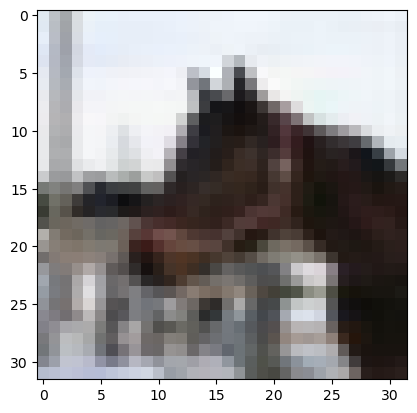

In [4]:
plt.imshow(X_train[1])

In [5]:
tf.random.set_seed(60)

In [183]:
DNN = tf.keras.Sequential()

In [184]:
DNN.add(tf.keras.layers.Flatten(input_shape=[32,32,3]))

In [185]:
for i in range(20):
    DNN.add(tf.keras.layers.Dense(100, activation="swish",kernel_initializer="he_normal"))

In [186]:
DNN.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [187]:
DNN.compile(optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5), loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [188]:
stop = tf.keras.callbacks.EarlyStopping( restore_best_weights=True,  patience=15)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)

In [189]:
index = 1
log_dir_model_1 = create_log_dir("model_1_simple")
tensorboard = tf.keras.callbacks.TensorBoard(log_dir_model_1)
callbacks = [stop, model_checkpoint, tensorboard]

In [190]:
DNN.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid), callbacks=callbacks)

Epoch 1/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 75s 24ms/step - accuracy: 0.1271 - loss: 11.1350 - val_accuracy: 0.2050 - val_loss: 2.1536
Epoch 2/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.2286 - loss: 2.0864 - val_accuracy: 0.2414 - val_loss: 2.0071
Epoch 3/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.2707 - loss: 1.9668 - val_accuracy: 0.2820 - val_loss: 1.9394
Epoch 4/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.3034 - loss: 1.8947 - val_accuracy: 0.2996 - val_loss: 1.8854
Epoch 5/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.3317 - loss: 1.8379 - val_accuracy: 0.3298 - val_loss: 1.8465
Epoch 6/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.3480 - loss: 1.7949 - val_accuracy: 0.3378 - val_loss: 1.8131
Epoch 7/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.3634 - loss: 1.7494 - val_accuracy: 0.3656 - val_loss: 1.7536
Epoch 8/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - a

In [191]:
DNN.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4293 - loss: 1.5952


[1.5987837314605713, 0.42820000648498535]

In [192]:
%load_ext tensorboard
%tensorboard --logdir=./Logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 14024), started 3:57:58 ago. (Use '!kill 14024' to kill it.)

In [193]:
DNN = tf.keras.Sequential()

In [194]:
DNN.add(tf.keras.layers.Flatten(input_shape=[32,32,3]))

In [195]:
for i in range(20):
    DNN.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    DNN.add(tf.keras.layers.BatchNormalization())
    DNN.add(tf.keras.layers.Activation("swish"))

In [196]:
DNN.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [197]:
DNN.compile(optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4), loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [198]:
stop = tf.keras.callbacks.EarlyStopping( restore_best_weights=True,  patience=15)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)

In [199]:
index = 1
log_dir_model_2 = create_log_dir("model_2_BatchNorm")
tensorboard = tf.keras.callbacks.TensorBoard(log_dir_model_2)
callbacks = [stop, model_checkpoint, tensorboard]

In [200]:
DNN.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid), callbacks=callbacks)

Epoch 1/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 146s 36ms/step - accuracy: 0.1905 - loss: 2.1965 - val_accuracy: 0.2922 - val_loss: 2.0048
Epoch 2/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.3426 - loss: 1.8082 - val_accuracy: 0.3170 - val_loss: 1.9373
Epoch 3/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.3972 - loss: 1.6785 - val_accuracy: 0.3364 - val_loss: 1.8975
Epoch 4/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.4333 - loss: 1.5909 - val_accuracy: 0.3614 - val_loss: 1.8398
Epoch 5/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.4610 - loss: 1.5213 - val_accuracy: 0.3930 - val_loss: 1.7579
Epoch 6/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.4870 - loss: 1.4542 - val_accuracy: 0.3616 - val_loss: 1.9038
Epoch 7/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 50s 35ms/step - accuracy: 0.5162 - loss: 1.3859 - val_accuracy: 0.3830 - val_loss: 1.8824
Epoch 8/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 46s 33ms/step - a

In [201]:
DNN.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4095 - loss: 1.7204


[1.7578718662261963, 0.3930000066757202]

In [203]:

DNN = tf.keras.Sequential()

In [204]:
DNN.add(tf.keras.layers.Flatten(input_shape=[32,32,3]))

In [205]:
for i in range(20):
    DNN.add(tf.keras.layers.Dense(100, kernel_initializer="lecun_normal", activation='selu'))

In [206]:
DNN.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [207]:
DNN.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=5e-4, momentum = 0.9, nesterov=True), loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [208]:
stop = tf.keras.callbacks.EarlyStopping( restore_best_weights=True,  patience=15)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)

In [209]:
index = 1
log_dir_model_3 = create_log_dir("model_3_Selu")
tensorboard = tf.keras.callbacks.TensorBoard(log_dir_model_3)
callbacks = [stop, model_checkpoint, tensorboard]

In [210]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train_scaled = (X_train - mean) / std
X_valid_scaled = (X_valid - mean) / std
X_test_scaled = (X_test - mean) / std

In [211]:
DNN.fit(X_train_scaled, y_train, epochs=1000, validation_data=(X_valid_scaled, y_valid), callbacks=callbacks)

Epoch 1/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 178s 42ms/step - accuracy: 0.3018 - loss: 1.9719 - val_accuracy: 0.3986 - val_loss: 1.6983
Epoch 2/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.4173 - loss: 1.6434 - val_accuracy: 0.4326 - val_loss: 1.5915
Epoch 3/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 92s 43ms/step - accuracy: 0.4581 - loss: 1.5306 - val_accuracy: 0.4468 - val_loss: 1.5556
Epoch 4/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 69s 49ms/step - accuracy: 0.4847 - loss: 1.4547 - val_accuracy: 0.4626 - val_loss: 1.5333
Epoch 5/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 64s 45ms/step - accuracy: 0.5055 - loss: 1.3901 - val_accuracy: 0.4614 - val_loss: 1.5296
Epoch 6/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.5266 - loss: 1.3340 - val_accuracy: 0.4688 - val_loss: 1.5239
Epoch 7/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.5428 - loss: 1.2913 - val_accuracy: 0.4744 - val_loss: 1.5235
Epoch 8/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 37ms/step - a

In [212]:
DNN.evaluate(X_valid_scaled, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4701 - loss: 1.5215


[1.5235320329666138, 0.47440001368522644]

In [213]:
%load_ext tensorboard
%tensorboard --logdir=./Logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 14024), started 4:37:06 ago. (Use '!kill 14024' to kill it.)

In [6]:
DNN = tf.keras.Sequential()

In [7]:
DNN.add(tf.keras.layers.Flatten(input_shape=[32,32,3]))

C:\Users\marce\anaconda4\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
for i in range(10):
    DNN.add(tf.keras.layers.Dense(300, kernel_initializer="he_normal", activation='swish'))
    DNN.add(tf.keras.layers.BatchNormalization())
    DNN.add(tf.keras.layers.Dropout(0.4))

In [18]:

DNN.add(tf.keras.layers.Dense(10, activation='softmax'))

In [19]:
lr0 = 0.01
DNN.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=lr0, momentum = 0.9, nesterov=True), loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [20]:
lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
stop = tf.keras.callbacks.EarlyStopping( restore_best_weights=True,  patience=15)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)

In [21]:
index = 1
log_dir_model_4 = create_log_dir("model_4")
tensorboard = tf.keras.callbacks.TensorBoard(log_dir_model_4)
callbacks = [stop, model_checkpoint,lr, tensorboard]

In [22]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train_scaled = (X_train - mean) / std
X_valid_scaled = (X_valid - mean) / std
X_test_scaled = (X_test - mean) / std

In [23]:
history = DNN.fit(X_train_scaled, y_train, epochs=1000, validation_data=(X_valid_scaled, y_valid), callbacks=[callbacks])

Epoch 1/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 179s 64ms/step - accuracy: 0.1128 - loss: 2.7126 - val_accuracy: 0.1734 - val_loss: 2.2501 - learning_rate: 0.0100
Epoch 2/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 60ms/step - accuracy: 0.1542 - loss: 2.3174 - val_accuracy: 0.1768 - val_loss: 2.1629 - learning_rate: 0.0100
Epoch 3/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 60ms/step - accuracy: 0.1581 - loss: 2.2110 - val_accuracy: 0.1832 - val_loss: 2.1193 - learning_rate: 0.0100
Epoch 4/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 86s 61ms/step - accuracy: 0.1645 - loss: 2.1458 - val_accuracy: 0.2024 - val_loss: 2.0886 - learning_rate: 0.0100
Epoch 5/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 90s 64ms/step - accuracy: 0.1696 - loss: 2.1428 - val_accuracy: 0.1970 - val_loss: 2.0730 - learning_rate: 0.0100
Epoch 6/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 91s 64ms/step - accuracy: 0.1831 - loss: 2.0854 - val_accuracy: 0.2138 - val_loss: 2.0370 - learning_rate: 0.0100
Epoch 7/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 91s 65m

In [24]:
DNN.evaluate(X_valid_scaled, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4433 - loss: 1.5852


[1.5928579568862915, 0.4429999887943268]

In [27]:
%load_ext tensorboard
%tensorboard --logdir=./Logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 14024), started 18:57:05 ago. (Use '!kill 14024' to kill it.)